In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.units as u
from asteria.stellardist import StellarDensity
from scipy.interpolate import PchipInterpolator
from scipy.optimize import minimize

In [2]:
def diff(x, r):
    diff = np.abs(Dist2Rate(x) - r)
    return float(diff)

def Dist2Rate(d):
    return sd_ccsn_rate(d)

def Rate2Dist(r_in):
    if not isinstance(r_in, np.ndarray):
        if r_in > sd_ccsn_tot_rate:
            r_in = sd_ccsn_tot_rate
        res = minimize(diff, x0=10, args=r_in)
        return res.x
    else:
        np.where(r_in>sd_ccsn_tot_rate,sd_ccsn_tot_rate,r_in)
        r_out = []
        for rr in r_in:
            res = minimize(diff, x0=10, args=rr)
            r_out.append(res.x)
        r_out = np.array(r_out)
        return r_out
    
def diff_cdf(x, cdf_val):
    if x > 25 + 1E-3: #everything above 25 kpc has a probability of 100%, but we want the 'edge' so we punish any
        # value that is higher than 25 kpc + epsilon, epsilon << 1
        return 1E6
    else:
        diff = np.abs(sd_cdf(x) - cdf_val)
        return float(diff)
    
def inv_cdf(cdf_val):
    if not isinstance(cdf_val, np.ndarray):
        res = minimize(diff_cdf, x0 = 5, args=cv)
        return res.x
    else:
        d = []
        for cv in cdf_val:
            loss, i = 1, 0
            x0s = np.array([5,10,15,20])
            while loss > 1E-3:
                res = minimize(diff_cdf, x0 = x0s[i], args=cv)
                loss = res.fun
                i += 1
                if i > 3:
                    print('Fit failed to converge!')
                    break
            d.append(res.x)
        d = np.array(d)
        return d
    
def MSE(v):
    return np.sqrt(np.sum((func(v)-sig)**2))

In [5]:
# stellar distribution file, Adams 2013 model, returns CDF
sd = StellarDensity('../../../data/stellar/sn_radial_distrib_adams.fits', add_LMC=False, add_SMC=False)

sd_cdf = PchipInterpolator(sd.dist.value, sd.cdf)
sd_ccsn = PchipInterpolator(sd.dist.value, sd.cdf)

In [56]:
# frequency results

vanilla_ic86 = np.array([[15.4,1.7,2.3],[13.6,1.5,1.8]])
vanilla_gen2 = np.array([[20.1,2.2,3.3],[17.7,1.5,2.3]])
vanilla_wls = np.array([[22.7,2.5,3.8],[20.0,2.1,2.6]])

freqdep_ic86 = np.array([[17.2,2.5,4.3],[14.1,2.1,2.3]])
freqdep_gen2 = np.array([[22.5,3.3,5.2],[18.3,2.1,3.0]])
freqdep_wls = np.array([[25.4,3.8,6.2],[20.5,2.4,3.5]])

timedep_ic86 = np.array([[17.5,1.9,2.9],[15.7,1.5,2.0]])
timedep_gen2 = np.array([[23.0,2.5,3.6],[20.6,1.8,2.7]])
timedep_wls = np.array([[26.1,2.9,4.4],[23.3,2.3,3.0]])

freqtimedep_ic86 = np.array([[21.4,3.4,6.3],[18.5,2.3,3.5]])
freqtimedep_gen2 = np.array([[28.2,4.5,8.3],[24.3,3.1,4.7]])
freqtimedep_wls = np.array([[32.1,5.0,9.2],[27.6,3.4,5.1]])

compex_ic86 = np.array([[10.1,1.3,1.9],[8.6,1.1,1.4]])
compex_gen2 = np.array([[13.0,1.8,2.3],[11.0,1.3,1.9]])
compex_wls = np.array([[14.4,2.0,2.8],[12.3,1.7,2.1]])

mswnh_ic86 = np.array([[14.0,1.6,2.4],[12.3,1.2,1.7]])
mswnh_gen2 = np.array([[18.2,2.0,3.0],[15.9,1.5,2.2]])
mswnh_wls = np.array([[20.5,2.4,3.3],[17.8,1.8,2.5]])

mswih_ic86 = np.array([[10.2,1.3,1.9],[8.7,1.1,1.5]])
mswih_gen2 = np.array([[13.1,1.7,2.3],[11.3,1.3,1.7]])
mswih_wls = np.array([[14.6,1.9,2.7],[12.5,1.7,2.0]])

m27d1_ic86 = np.array([[10.8,1.1,1.7],[9.2,0.7,1.2]])
m27d1_gen2 = np.array([[13.7,1.3,2.1],[11.8,1.0,1.3]])
m27d1_wls = np.array([[15.4,1.6,2.5],[13.1,1.3,1.7]])

m27d2_ic86 = np.array([[9.9,1.1,1.6],[8.4,0.8,1.2]])
m27d2_gen2 = np.array([[12.5,1.4,2.1],[10.7,1.0,1.4]])
m27d2_wls = np.array([[14.0,1.5,2.3],[11.9,1.3,1.6]])

m27d3_ic86 = np.array([[9.4,1.0,1.6],[8.1,0.8,1.1]])
m27d3_gen2 = np.array([[12.0,1.2,2.1],[10.3,1.0,1.3]])
m27d3_wls = np.array([[13.5,1.5,2.2],[11.5,1.2,1.6]])

freq_ic86 = [vanilla_ic86, freqdep_ic86, timedep_ic86, freqtimedep_ic86, 
             compex_ic86, mswnh_ic86, mswih_ic86, m27d1_ic86, m27d2_ic86, m27d3_ic86]
freq_gen2 = [vanilla_gen2, freqdep_gen2, timedep_gen2, freqtimedep_gen2, 
             compex_gen2, mswnh_gen2, mswih_gen2, m27d1_gen2, m27d2_gen2, m27d3_gen2]
freq_wls = [vanilla_wls, freqdep_wls, timedep_wls, freqtimedep_wls, 
             compex_wls, mswnh_wls, mswih_wls, m27d1_wls, m27d2_wls, m27d3_wls]

In [57]:
# amplitude results

ampl_vanilla_ic86 = np.array([[8.8,0.5,0.8],[7.2,0.4,0.5]])
ampl_vanilla_gen2 = np.array([[11.2,0.8,1.0],[9.1,0.5,0.6]])
ampl_vanilla_wls = np.array([[12.4,0.9,1.2],[10.0,0.7,0.8]])

vanilla_ic86 = np.array([[8.8,0.5,0.8],[7.2,0.4,0.5]])
vanilla_gen2 = np.array([[11.2,0.8,1.0],[9.1,0.5,0.6]])
vanilla_wls = np.array([[12.4,0.9,1.2],[10.0,0.7,0.8]])

timewid_ic86 = np.array([[11.0,1.0,1.4],[8.8,0.5,0.8]])
timewid_gen2 = np.array([[13.9,1.1,1.7],[11.1,0.7,1.0]])
timewid_wls = np.array([[15.4,1.3,2.1],[12.3,0.9,1.1]])

freqplus_ic86 = np.array([[8.9,0.6,0.9],[7.3,0.4,0.5]])
freqplus_gen2 = np.array([[11.3,0.7,0.9],[9.1,0.5,0.7]])
freqplus_wls = np.array([[12.5,0.9,1.2],[9.9,0.5,0.8]])

freqminus_ic86 = np.array([[8.8,0.6,0.8],[7.2,0.4,0.5]])
freqminus_gen2 = np.array([[11.1,0.7,1.0],[9.1,0.5,0.6]])
freqminus_wls = np.array([[12.3,0.9,1.1],[9.9,0.6,0.7]])

compex_ic86 = np.array([[7.6,0.8,1.2],[6.0,0.5,0.7]])
compex_gen2 = np.array([[9.1,0.8,1.3],[7.2,0.6,0.8]])
compex_wls = np.array([[9.8,1.1,1.7],[7.5,0.8,1.0]])

mswnh_ic86 = np.array([[8.6,0.6,0.9],[7.0,0.4,0.5]])
mswnh_gen2 = np.array([[10.9,0.8,1.0],[8.8,0.6,0.7]])
mswnh_wls = np.array([[11.9,0.9,1.4],[9.5,0.7,0.8]])

mswih_ic86 = np.array([[7.6,0.7,1.4],[6.1,0.5,0.6]])
mswih_gen2 = np.array([[9.2,0.8,1.4],[7.3,0.6,0.8]])
mswih_wls = np.array([[10.0,1.1,1.6],[7.6,0.8,1.0]])

m27d1_ic86 = np.array([[7.6,0.5,0.7],[6.2,0.4,0.5]])
m27d1_gen2 = np.array([[9.4,0.6,0.9],[7.9,0.5,0.5]])
m27d1_wls = np.array([[10.4,0.8,1.0],[8.4,0.6,0.6]])

m27d2_ic86 = np.array([[7.0,0.6,0.8],[5.8,0.4,0.5]])
m27d2_gen2 = np.array([[8.7,0.7,1.1],[7.2,0.5,0.7]])
m27d2_wls = np.array([[9.5,0.9,1.2],[7.7,0.6,0.8]])

m27d3_ic86 = np.array([[6.6,0.6,0.9],[5.4,0.4,0.5]])
m27d3_gen2 = np.array([[8.0,0.7,1.0],[6.5,0.5,0.6]])
m27d3_wls = np.array([[8.8,0.9,1.1],[6.8,0.6,0.8]])

ampl_ic86 = [vanilla_ic86, timewid_ic86, freqplus_ic86, freqminus_ic86, 
             compex_ic86, mswnh_ic86, mswih_ic86, m27d1_ic86, m27d2_ic86, m27d3_ic86]
ampl_gen2 = [vanilla_gen2, timewid_gen2, freqplus_gen2, freqminus_gen2, 
             compex_gen2, mswnh_gen2, mswih_gen2, m27d1_gen2, m27d2_gen2, m27d3_gen2]
ampl_wls = [vanilla_wls, timewid_wls, freqplus_wls, freqminus_wls, 
             compex_wls, mswnh_wls, mswih_wls, m27d1_wls, m27d2_wls, m27d3_wls]

In [58]:
# template results

vanilla_ic86 = np.array([[19.6,2.4,3.4],[15.9,1.3,1.8]])
vanilla_gen2 = np.array([[25.6,3.0,4.4],[20.8,1.7,2.1]])
vanilla_wls = np.array([[29.0,3.2,5.2],[23.5,1.8,2.7]])

timewid_ic86 = np.array([[20.6,2.6,4.2],[16.4,1.4,1.9]])
timewid_gen2 = np.array([[27.1,3.2,5.4],[21.5,1.8,2.6]])
timewid_wls = np.array([[30.8,4.0,6.4],[24.5,2.3,2.6]])

freqplus_ic86 = np.array([[13.5,1.6,2.5],[10.6,1.0,1.2]])
freqplus_gen2 = np.array([[17.4,2.0,3.0],[13.8,1.2,1.4]])
freqplus_wls = np.array([[19.6,2.3,3.5],[15.2,1.2,1.9]])

freqminus_ic86 = np.array([[12.6,1.4,2.5],[9.9,0.9,1.3]])
freqminus_gen2 = np.array([[16.5,1.9,3.1],[12.9,1.2,1.5]])
freqminus_wls = np.array([[18.5,2.2,3.9],[14.2,1.2,2.0]])

perhalf_ic86 = np.array([[17.9,2.0,2.7],[14.6,1.1,1.6]])
perhalf_gen2 = np.array([[23.3,2.4,3.6],[19.1,1.4,2.0]])
perhalf_wls = np.array([[26.3,2.6,4.5],[21.5,1.6,2.2]])

perdoub_ic86 = np.array([[17.9,2.4,3.7],[14.0,1.2,1.8]])
perdoub_gen2 = np.array([[23.4,2.8,5.0],[18.3,1.6,2.4]])
perdoub_wls = np.array([[26.8,3.5,5.3],[20.8,1.9,2.5]])

compex_ic86 = np.array([[13.2,1.6,2.5],[10.7,0.9,1.4]])
compex_gen2 = np.array([[17.3,2.2,3.3],[14.2,1.4,1.4]])
compex_wls = np.array([[19.6,2.5,3.9],[15.8,1.5,1.9]])

mswnh_ic86 = np.array([[17.8,2.2,3.2],[14.5,1.2,1.6]])
mswnh_gen2 = np.array([[23.3,2.8,3.9],[19.1,1.6,1.9]])
mswnh_wls = np.array([[26.4,3.0,4.8],[21.4,1.8,2.4]])

mswih_ic86 = np.array([[13.4,1.7,2.6],[10.9,1.0,1.3]])
mswih_gen2 = np.array([[17.5,2.2,3.3],[14.3,1.4,1.5]])
mswih_wls = np.array([[19.8,2.5,4.0],[16.0,1.5,1.7]])

m27d1_ic86 = np.array([[12.4,1.6,2.1],[9.9,0.9,1.0]])
m27d1_gen2 = np.array([[16.1,1.9,3.0],[12.9,1.1,1.3]])
m27d1_wls = np.array([[18.1,2.1,3.4],[14.3,1.3,1.7]])

m27d2_ic86 = np.array([[5.5,1.0,1.5],[4.1,0.8,0.8]])
m27d2_gen2 = np.array([[6.7,1.2,1.8],[4.8,1.0,1.0]])
m27d2_wls = np.array([[6.9,1.8,2.2],[3.9,2.7,3.9]])

m27d3_ic86 = np.array([[5.2,0.9,1.4], [3.7,0.8,0.8]])
m27d3_gen2 = np.array([[6.2,1.1,1.5], [4.0,4.0,1.2]])
m27d3_wls = np.array([[6.0,2.0,2.1], [0.0,0.0,4.0]])

temp_ic86 = [vanilla_ic86, timewid_ic86, freqplus_ic86, freqminus_ic86, perhalf_ic86, perdoub_ic86,
             compex_ic86, mswnh_ic86, mswih_ic86, m27d1_ic86, m27d2_ic86, m27d3_ic86]
temp_gen2 = [vanilla_gen2, timewid_gen2, freqplus_gen2, freqminus_gen2, perhalf_gen2, perdoub_gen2,
             compex_gen2, mswnh_gen2, mswih_gen2, m27d1_gen2, m27d2_gen2, m27d3_gen2]
temp_wls = [vanilla_wls, timewid_wls, freqplus_wls, freqminus_wls, perhalf_wls, perdoub_wls,
             compex_wls, mswnh_wls, mswih_wls, m27d1_wls, m27d2_wls, m27d3_wls]

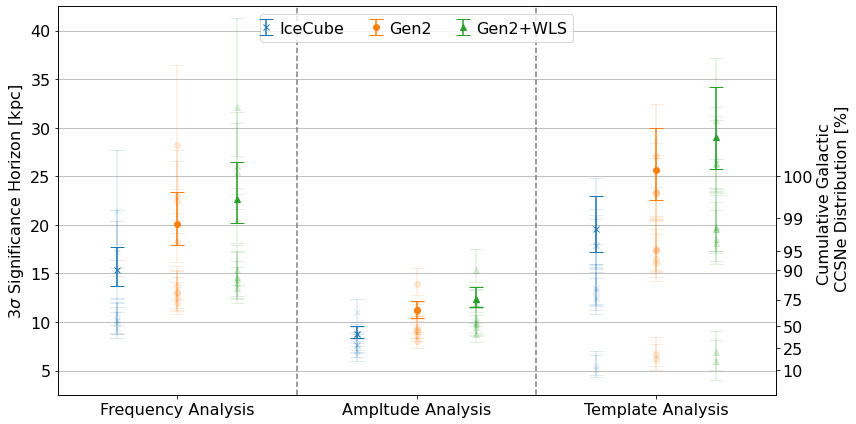

In [79]:
mpl.rcParams['legend.handlelength'] = 0
mpl.rcParams['legend.markerscale'] = 1

fig, ax = plt.subplots(1,1, figsize = (12,6))

for j in range(len(freq_ic86)):
    alpha = 1 if j == 0 else 0.15
    ax.errorbar(x=-0.25, y=freq_ic86[j][0][0], yerr=freq_ic86[j][0][1:].reshape(-1,1), capsize=7, marker = 'x', 
                color = 'C0', alpha=alpha)
    ax.errorbar(x=0, y=freq_gen2[j][0][0], yerr=freq_gen2[j][0][1:].reshape(-1,1), capsize=7, marker = 'o', 
                color = 'C1', alpha=alpha)
    ax.errorbar(x=0.25, y=freq_wls[j][0][0], yerr=freq_wls[j][0][1:].reshape(-1,1), capsize=7, marker = '^', 
                color = 'C2', alpha=alpha)

ax.axvline(0.5, color = 'grey', ls = '--')

for j in range(len(ampl_ic86)):
    alpha = 1 if j == 0 else 0.15
    ax.errorbar(x=0.75, y=ampl_ic86[j][0][0], yerr=ampl_ic86[j][0][1:].reshape(-1,1), capsize=7, marker = 'x', 
                color = 'C0', alpha=alpha)
    ax.errorbar(x=1, y=ampl_gen2[j][0][0], yerr=ampl_gen2[j][0][1:].reshape(-1,1), capsize=7, marker = 'o', 
                color = 'C1', alpha=alpha)
    ax.errorbar(x=1.25, y=ampl_wls[j][0][0], yerr=ampl_wls[j][0][1:].reshape(-1,1), capsize=7, marker = '^', 
                color = 'C2', alpha=alpha)

ax.axvline(1.5, color = 'grey', ls = '--')

for j in range(len(temp_ic86)):
    alpha = 1 if j == 0 else 0.15
    ax.errorbar(x=1.75, y=temp_ic86[j][0][0], yerr=temp_ic86[j][0][1:].reshape(-1,1), capsize=7, marker = 'x', 
                color = 'C0', alpha=alpha)
    ax.errorbar(x=2, y=temp_gen2[j][0][0], yerr=temp_gen2[j][0][1:].reshape(-1,1), capsize=7, marker = 'o', 
                color = 'C1', alpha=alpha)
    ax.errorbar(x=2.25, y=temp_wls[j][0][0], yerr=temp_wls[j][0][1:].reshape(-1,1), capsize=7, marker = '^', 
                color = 'C2', alpha=alpha)


ax.errorbar(x=-1, y=freq_ic86[0][0][0], yerr=freq_ic86[0][0][1:].reshape(-1,1), capsize=7, marker = 'x', 
            color = 'C0', alpha=1, label = 'IceCube')
ax.errorbar(x=-1, y=freq_gen2[0][0][0], yerr=freq_gen2[0][0][1:].reshape(-1,1), capsize=7, marker = 'o', 
            color = 'C1', alpha=1, label = 'Gen2')
ax.errorbar(x=-1, y=freq_wls[0][0][0], yerr=freq_wls[0][0][1:].reshape(-1,1), capsize=7, marker = '^', 
            color = 'C2', alpha=1, label = 'Gen2+WLS')
 
    
ax.tick_params(labelsize = 16)
ax.grid(axis='y')
ax.set_xlim(-0.5,2.5)
ax.set_ylim(2.5,42.5)
ax.legend(ncol=3, loc = 'upper center', fontsize=16)

ax.set_xticks([0,1,2],['Frequency Analysis','Ampltude Analysis','Template Analysis'], fontsize=16)    
ax.set_ylabel(r'$3\sigma$ Significance Horizon [kpc]', fontsize=16)

rates = np.array([0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
ax21 = ax.twinx()
ax21.set_ylim(ax.get_ylim())
ax21.set_yticks(inv_cdf(rates).flatten())
ax21.set_yticklabels((rates*100).astype(dtype=int), rotation = 0, fontsize = 16)
ax21.set_ylabel('Cumulative Galactic \n CCSNe Distribution [%]', fontsize = 16)

plt.tight_layout()
plt.savefig('./plots/ftf_summary.pdf',dpi = 200)